In [26]:
"""
GEORG_STOTZINGEN_A1_Analysis
"""

# Importing all neccessary packages.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn.linear_model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error


# Importing data set.
original_df = pd.read_excel('C:/Users/Georg/Desktop/Hult/MSBA/Machine Learning/Case/Apprentice_Chef_Dataset.xlsx')

# Making a copy with shorter name to protect original_df.
df = original_df.copy()

# Lower casing for ease of use.
df.columns = map (str.lower, df.columns)

# Creating a missing values column. 
# We are not filling them now, but want to know them for possible future analysis.
# Looping over columns and filling missing values columns with 1 if missing
for col in df:
    if df[col].isnull().astype(int).sum() > 0:
        df['m_'+col] = df[col].isnull().astype(int)

# Quantile analysis
#The last quantile seems to be a huge step and represent a big part of revenue
df.loc[:, :].quantile([0.20,
                            0.40,
                            0.60,
                            0.80,
                            1.00])

,revenue,cross_sell_success,total_meals_ordered,unique_meals_purch,contacts_w_customer_service,product_categories_viewed,avg_time_per_site_visit,mobile_number,cancellations_before_noon,cancellations_after_noon,...,package_locker,refrigerated_locker,followed_recommendations_pct,avg_prep_vid_time,largest_order_size,master_classes_attended,median_meal_rating,avg_clicks_per_visit,total_photos_viewed,m_family_name
0.2,1285.00,0.0,35.0,3.0,5.0,2.0,61.58,1.0,0.0,0.0,...,0.0,0.0,10.0,108.6,3.0,0.0,2.0,12.0,0.0,0.0
0.4,1558.00,1.0,51.0,4.0,6.0,4.0,86.51,1.0,1.0,0.0,...,0.0,0.0,20.0,134.4,4.0,0.0,3.0,13.0,0.0,0.0
0.6,1910.00,1.0,71.0,6.0,7.0,6.0,102.62,1.0,1.0,0.0,...,0.0,0.0,40.0,156.7,5.0,1.0,3.0,14.0,28.0,0.0
0.8,2895.00,1.0,106.0,7.0,9.0,9.0,123.80,1.0,2.0,0.0,...,1.0,0.0,70.0,183.8,6.0,1.0,3.0,16.0,210.0,0.0
1.0,8793.75,1.0,493.0,19.0,18.0,10.0,1645.60,1.0,13.0,3.0,...,1.0,1.0,90.0,564.2,11.0,3.0,5.0,19.0,1600.0,1.0


Text(0.5, 0, 'total_photos_viewed')

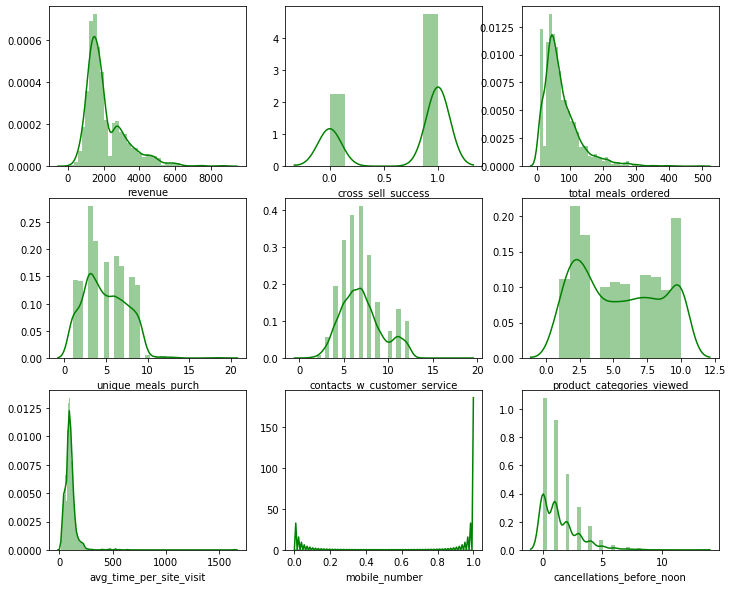

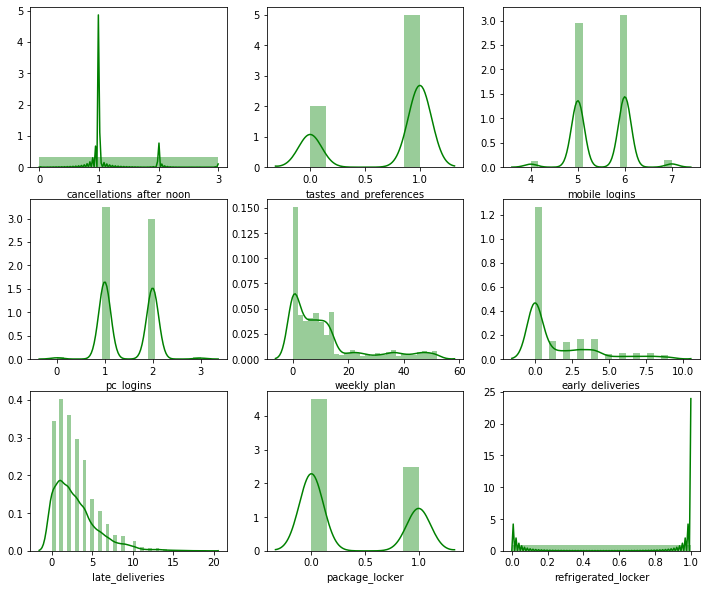

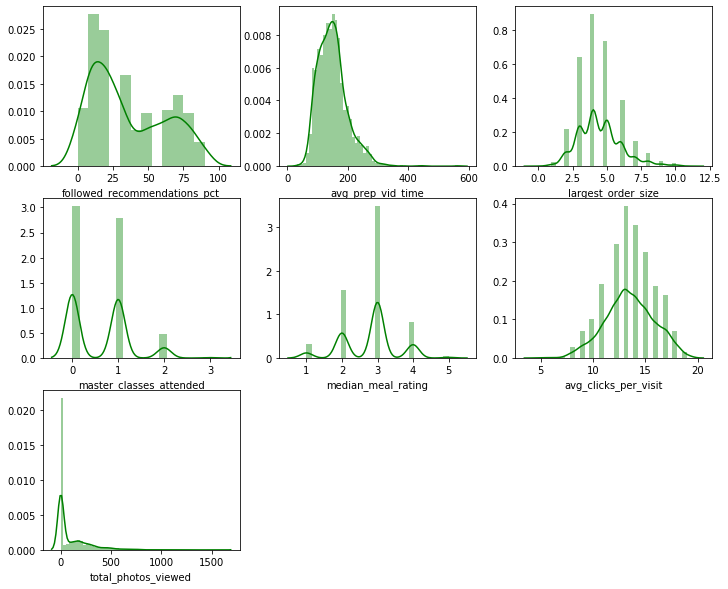

In [2]:
##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# Outlier analysis

# Histograms
fig, ax = plt.subplots(figsize = (12, 10))
plt.subplot(3, 3, 1)
sns.distplot(df['revenue'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('revenue')

plt.subplot(3, 3, 2)
sns.distplot(df['cross_sell_success'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('cross_sell_success')

plt.subplot(3, 3, 3)
sns.distplot(df['total_meals_ordered'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('total_meals_ordered')

plt.subplot(3, 3, 4)
sns.distplot(df['unique_meals_purch'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('unique_meals_purch')

plt.subplot(3, 3, 5)
sns.distplot(df['contacts_w_customer_service'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('contacts_w_customer_service')

plt.subplot(3, 3, 6)
sns.distplot(df['product_categories_viewed'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('product_categories_viewed')

plt.subplot(3, 3, 7)
sns.distplot(df['avg_time_per_site_visit'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('avg_time_per_site_visit')

plt.subplot(3, 3, 8)
sns.distplot(df['mobile_number'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('mobile_number')

plt.subplot(3, 3, 9)
sns.distplot(df['cancellations_before_noon'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('cancellations_before_noon')

########################

fig, ax = plt.subplots(figsize = (12, 10))
plt.subplot(3, 3, 1)
sns.distplot(df['cancellations_after_noon'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('cancellations_after_noon')

plt.subplot(3, 3, 2)
sns.distplot(df['tastes_and_preferences'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('tastes_and_preferences')

plt.subplot(3, 3, 3)
sns.distplot(df['mobile_logins'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('mobile_logins')

plt.subplot(3, 3, 4)
sns.distplot(df['pc_logins'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('pc_logins')

plt.subplot(3, 3, 5)
sns.distplot(df['weekly_plan'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('weekly_plan')

plt.subplot(3, 3, 6)
sns.distplot(df['early_deliveries'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('early_deliveries')

plt.subplot(3, 3, 7)
sns.distplot(df['late_deliveries'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('late_deliveries')

plt.subplot(3, 3, 8)
sns.distplot(df['package_locker'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('package_locker')

plt.subplot(3, 3, 9)
sns.distplot(df['refrigerated_locker'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('refrigerated_locker')

########################

fig, ax = plt.subplots(figsize = (12, 10))
plt.subplot(3, 3, 1)
sns.distplot(df['followed_recommendations_pct'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('followed_recommendations_pct')

plt.subplot(3, 3, 2)
sns.distplot(df['avg_prep_vid_time'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('avg_prep_vid_time')

plt.subplot(3, 3, 3)
sns.distplot(df['largest_order_size'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('largest_order_size')

plt.subplot(3, 3, 4)
sns.distplot(df['master_classes_attended'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('master_classes_attended')

plt.subplot(3, 3, 5)
sns.distplot(df['median_meal_rating'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('median_meal_rating')

plt.subplot(3, 3, 6)
sns.distplot(df['avg_clicks_per_visit'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('avg_clicks_per_visit')

plt.subplot(3, 3, 7)
sns.distplot(df['total_photos_viewed'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('total_photos_viewed')




In [3]:
#setting outlier thresholds

revenue_hi                          = 5500
total_meals_ordered_hi              = 220
total_meals_ordered_lo              = 16
unique_meals_purch_hi               = 9
contacts_w_customer_service_hi      = 13
contacts_w_customer_service_lo      = 3
product_categories_viewed_hi        = 10
product_categories_viewed_lo        = 1
avg_time_per_site_visit_hi          = 260
avg_time_per_site_visit_lo          = 20
cancellations_before_noon_hi        = 5
cancellations_after_noon_hi         = 1.5
mobile_logins_lo                    = 5
pc_logins_hi                        = 2
weekly_plan_hi                      = 20
early_deliveries_hi                 = 5
late_deliveries_hi                  = 8
avg_prep_vid_time_hi                = 300
largest_order_size_lo               = 2
largest_order_size_hi               = 7
master_classes_attended_hi          = 3
median_meal_rating_hi               = 5
avg_clicks_per_visit_lo             = 8
total_photos_viewed_hi              = 400

In [4]:
# Developing feature columns for outliers

# total_meals_ordered_hi_lo
df['out_total_meals_ordered'] = 0
condition_hi = df.loc[0:,'out_total_meals_ordered'][df['total_meals_ordered'] > total_meals_ordered_hi]
condition_lo = df.loc[0:,'out_total_meals_ordered'][df['total_meals_ordered'] < total_meals_ordered_lo]

df['out_total_meals_ordered'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
df['out_total_meals_ordered'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

# unique_meals_purch_hi
df['out_unique_meals_purch'] = 0
condition_hi = df.loc[0:,'out_unique_meals_purch'][df['unique_meals_purch'] > unique_meals_purch_hi]

df['out_unique_meals_purch'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# contacts_w_customer_service_hi_lo
df['out_contacts_w_customer_service'] = 0
condition_hi = df.loc[0:,'out_contacts_w_customer_service'][df['contacts_w_customer_service'] > contacts_w_customer_service_hi]
condition_lo = df.loc[0:,'out_contacts_w_customer_service'][df['contacts_w_customer_service'] < contacts_w_customer_service_lo]

df['out_contacts_w_customer_service'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

df['out_contacts_w_customer_service'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# product_categories_viewed_hi_lo
df['out_product_categories_viewed'] = 0
condition_hi = df.loc[0:,'out_product_categories_viewed'][df['product_categories_viewed'] > product_categories_viewed_hi]
condition_lo = df.loc[0:,'out_product_categories_viewed'][df['product_categories_viewed'] < product_categories_viewed_lo]

df['out_product_categories_viewed'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

df['out_product_categories_viewed'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# avg_time_per_site_visit_hi_lo
df['out_avg_time_per_site_visit'] = 0
condition_hi = df.loc[0:,'out_avg_time_per_site_visit'][df['avg_time_per_site_visit'] > avg_time_per_site_visit_hi]
condition_lo = df.loc[0:,'out_avg_time_per_site_visit'][df['avg_time_per_site_visit'] < avg_time_per_site_visit_lo]

df['out_avg_time_per_site_visit'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
df['out_avg_time_per_site_visit'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

# cancellations_before_noon_hi
df['out_cancellations_before_noon'] = 0
condition_hi = df.loc[0:,'out_cancellations_before_noon'][df['cancellations_before_noon'] > cancellations_before_noon_hi]

df['out_cancellations_before_noon'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# cancellations_after_noon_hi
df['out_cancellations_after_noon'] = 0
condition_hi = df.loc[0:,'out_cancellations_after_noon'][df['cancellations_after_noon'] > cancellations_after_noon_hi]

df['out_cancellations_after_noon'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# mobile_logins_lo
df['out_mobile_logins'] = 0
condition_lo = df.loc[0:,'out_mobile_logins'][df['mobile_logins'] < mobile_logins_lo]

df['out_mobile_logins'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

# pc_logins_hi
df['out_pc_logins'] = 0
condition_hi = df.loc[0:,'out_pc_logins'][df['pc_logins'] > pc_logins_hi]

df['out_pc_logins'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# weekly_plan_hi
df['out_weekly_plan'] = 0
condition_hi = df.loc[0:,'out_weekly_plan'][df['weekly_plan'] > weekly_plan_hi]

df['out_weekly_plan'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# early_deliveries_hi
df['out_early_deliveries'] = 0
condition_hi = df.loc[0:,'out_early_deliveries'][df['early_deliveries'] > early_deliveries_hi]

df['out_early_deliveries'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# late_deliveries_hi
df['out_late_deliveries'] = 0
condition_hi = df.loc[0:,'out_late_deliveries'][df['late_deliveries'] > late_deliveries_hi]

df['out_late_deliveries'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# avg_prep_vid_time_hi
df['out_avg_prep_vid_time'] = 0
condition_hi = df.loc[0:,'out_avg_prep_vid_time'][df['avg_prep_vid_time'] > avg_prep_vid_time_hi]

df['out_avg_prep_vid_time'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# largest_order_size_hi_lo
df['out_largest_order_size'] = 0
condition_hi = df.loc[0:,'out_largest_order_size'][df['largest_order_size'] > largest_order_size_hi]
condition_lo = df.loc[0:,'out_largest_order_size'][df['largest_order_size'] < largest_order_size_lo]

df['out_largest_order_size'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

df['out_largest_order_size'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# master_classes_attended_hi
df['out_master_classes_attended'] = 0
condition_hi = df.loc[0:,'out_master_classes_attended'][df['master_classes_attended'] > master_classes_attended_hi]

df['out_master_classes_attended'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# median_meal_rating_hi
df['out_median_meal_rating'] = 0
condition_hi = df.loc[0:,'out_median_meal_rating'][df['median_meal_rating'] > median_meal_rating_hi]

df['out_median_meal_rating'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# avg_clicks_per_visit_lo
df['out_avg_clicks_per_visit'] = 0
condition_lo = df.loc[0:,'out_avg_clicks_per_visit'][df['avg_clicks_per_visit'] < avg_clicks_per_visit_lo]

df['out_avg_clicks_per_visit'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

# total_photos_viewed_hi
df['out_total_photos_viewed'] = 0
condition_hi = df.loc[0:,'out_total_photos_viewed'][df['total_photos_viewed'] > total_photos_viewed_hi]

df['out_total_photos_viewed'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# revenue_hi
df['out_revenue'] = 0
condition_hi = df.loc[0:,'out_revenue'][df['revenue'] > revenue_hi]

df['out_revenue'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

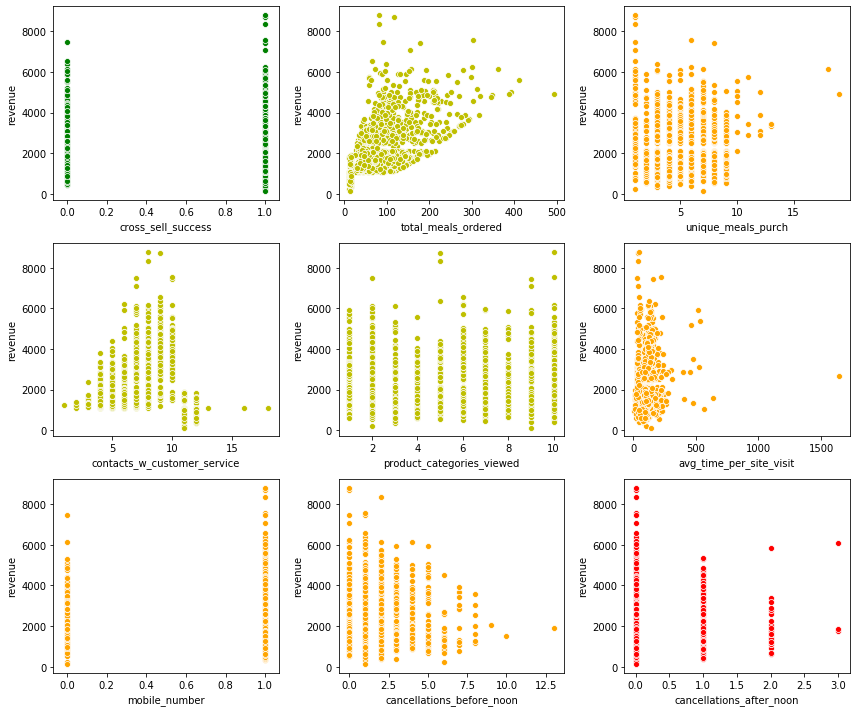

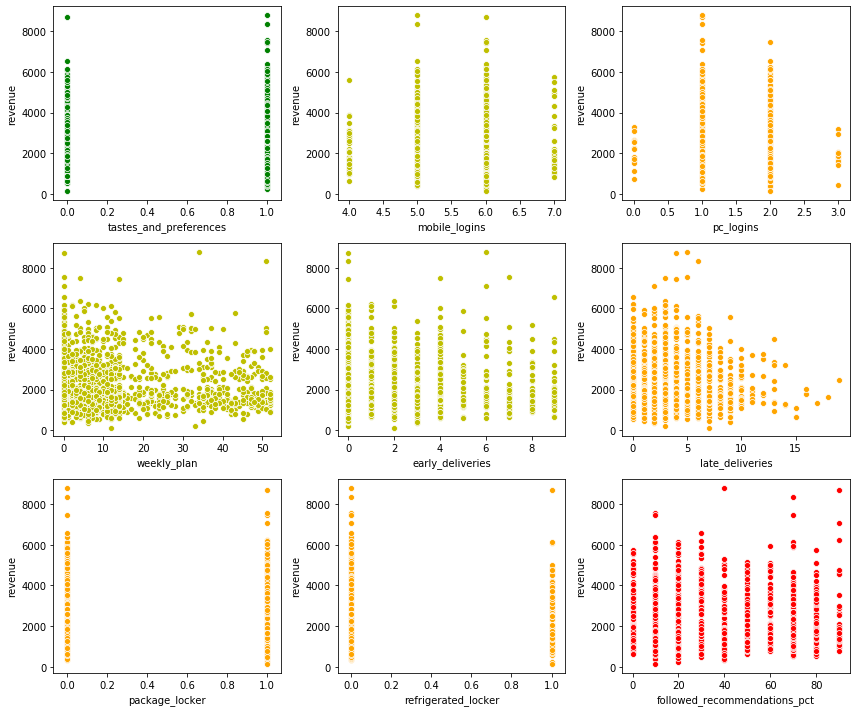

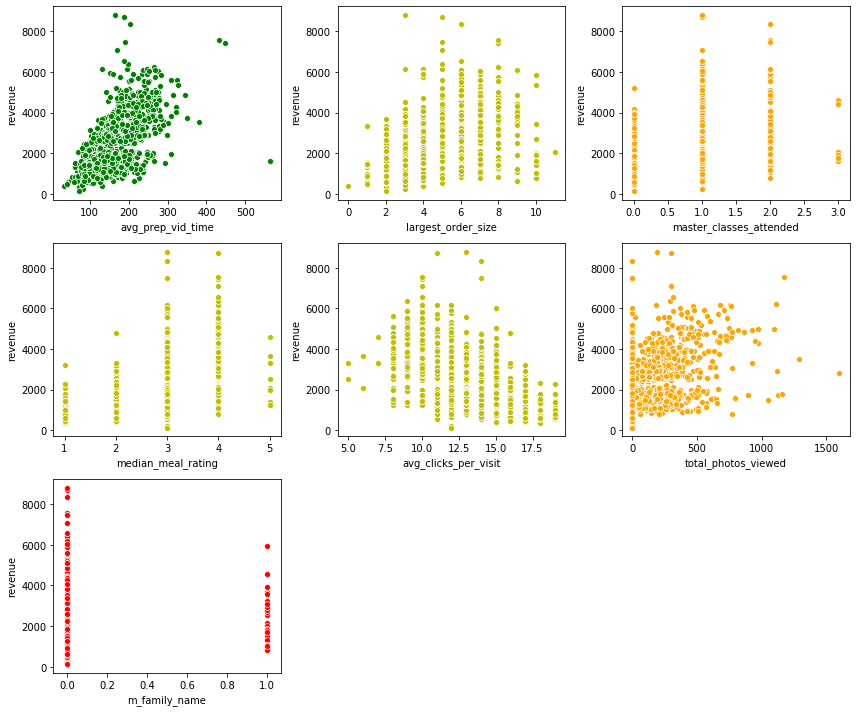

In [5]:

# Visual EDA (Scatterplots)

fig, ax = plt.subplots(figsize = (12, 10))
plt.subplot(3, 3, 1)
sns.scatterplot(x = df['cross_sell_success'],
                y = df['revenue'],
                color = 'g')
plt.xlabel('cross_sell_success')

########################

plt.subplot(3, 3, 2)
sns.scatterplot(x = df['total_meals_ordered'],
                y = df['revenue'],
                color = 'y')
plt.xlabel('total_meals_ordered')

########################

plt.subplot(3, 3, 3)
sns.scatterplot(x = df['unique_meals_purch'],
                y = df['revenue'],
                color = 'orange')
plt.xlabel('unique_meals_purch')

########################

plt.subplot(3, 3, 4)
sns.scatterplot(x = df['contacts_w_customer_service'],
                y = df['revenue'],
                color = 'y')
plt.xlabel('contacts_w_customer_service')

########################

plt.subplot(3, 3, 5)
sns.scatterplot(x = df['product_categories_viewed'],
                y = df['revenue'],
                color = 'y')
plt.xlabel('product_categories_viewed')

########################

plt.subplot(3, 3, 6)
sns.scatterplot(x = df['avg_time_per_site_visit'],
                y = df['revenue'],
                color = 'orange')
plt.xlabel('avg_time_per_site_visit')

########################

plt.subplot(3, 3, 7)
sns.scatterplot(x = df['mobile_number'],
                y = df['revenue'],
                color = 'orange')
plt.xlabel('mobile_number')

########################

plt.subplot(3, 3, 8)
sns.scatterplot(x = df['cancellations_before_noon'],
                y = df['revenue'],
                color = 'orange')
plt.xlabel('cancellations_before_noon')

########################

plt.subplot(3, 3, 9)
sns.scatterplot(x = df['cancellations_after_noon'],
                y = df['revenue'],
                color = 'r')
plt.xlabel('cancellations_after_noon')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (12, 10))
plt.subplot(3, 3, 1)
sns.scatterplot(x = df['tastes_and_preferences'],
                y = df['revenue'],
                color = 'g')
plt.xlabel('tastes_and_preferences')

########################

plt.subplot(3, 3, 2)
sns.scatterplot(x = df['mobile_logins'],
                y = df['revenue'],
                color = 'y')
plt.xlabel('mobile_logins')

########################

plt.subplot(3, 3, 3)
sns.scatterplot(x = df['pc_logins'],
                y = df['revenue'],
                color = 'orange')
plt.xlabel('pc_logins')

########################

plt.subplot(3, 3, 4)
sns.scatterplot(x = df['weekly_plan'],
                y = df['revenue'],
                color = 'y')
plt.xlabel('weekly_plan')

########################

plt.subplot(3, 3, 5)
sns.scatterplot(x = df['early_deliveries'],
                y = df['revenue'],
                color = 'y')
plt.xlabel('early_deliveries')

########################

plt.subplot(3, 3, 6)
sns.scatterplot(x = df['late_deliveries'],
                y = df['revenue'],
                color = 'orange')
plt.xlabel('late_deliveries')

########################

plt.subplot(3, 3, 7)
sns.scatterplot(x = df['package_locker'],
                y = df['revenue'],
                color = 'orange')
plt.xlabel('package_locker')

########################

plt.subplot(3, 3, 8)
sns.scatterplot(x = df['refrigerated_locker'],
                y = df['revenue'],
                color = 'orange')
plt.xlabel('refrigerated_locker')

########################

plt.subplot(3, 3, 9)
sns.scatterplot(x = df['followed_recommendations_pct'],
                y = df['revenue'],
                color = 'r')
plt.xlabel('followed_recommendations_pct')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (12, 10))
plt.subplot(3, 3, 1)
sns.scatterplot(x = df['avg_prep_vid_time'],
                y = df['revenue'],
                color = 'g')
plt.xlabel('avg_prep_vid_time')

########################

plt.subplot(3, 3, 2)
sns.scatterplot(x = df['largest_order_size'],
                y = df['revenue'],
                color = 'y')
plt.xlabel('largest_order_size')

########################

plt.subplot(3, 3, 3)
sns.scatterplot(x = df['master_classes_attended'],
                y = df['revenue'],
                color = 'orange')
plt.xlabel('master_classes_attended')

########################

plt.subplot(3, 3, 4)
sns.scatterplot(x = df['median_meal_rating'],
                y = df['revenue'],
                color = 'y')
plt.xlabel('median_meal_rating')

########################

plt.subplot(3, 3, 5)
sns.scatterplot(x = df['avg_clicks_per_visit'],
                y = df['revenue'],
                color = 'y')
plt.xlabel('avg_clicks_per_visit')

########################

plt.subplot(3, 3, 6)
sns.scatterplot(x = df['total_photos_viewed'],
                y = df['revenue'],
                color = 'orange')
plt.xlabel('total_photos_viewed')

########################

plt.subplot(3, 3, 7)
sns.scatterplot(x = df['m_family_name'],
                y = df['revenue'],
                color = 'r')
plt.xlabel('m_family_name')
plt.tight_layout()
plt.show()

########################
########################

In [6]:
#setting trend based thresholds
total_meals_ordered_lo                     = 20 # minimum of 11 to even be included in the dataset
unique_meals_purch_change_hi               = 9  # different data structure above
contacts_w_customer_service_change_hi      = 10 # trend changes after
avg_time_per_site_visit_change_hi          = 250
weekly_plan_hi                             = 15
avg_prep_vid_time_hi                       = 320
largest_order_size_change_hi               = 6  # trend changes after this point
median_meal_rating_change_lo               = 3  # trend changes after this point
avg_clicks_per_visit_change_hi             = 10 # trend changes after this point
avg_clicks_per_visit_change_lo             = 8  # no revenue blow this point
total_photos_viewed_change_at              = 0  # zero inflated

In [7]:
##############################################################################
## Feature Engineering (trend changes)                                      ##
##############################################################################

# developing features (columns) for trend changes

#change above threshold

# unique_meals_purch_change_hi
df['change_unique_meals_purch'] = 0
condition = df.loc[0:,'change_unique_meals_purch'][df['unique_meals_purch'] > unique_meals_purch_change_hi]

df['change_unique_meals_purch'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# contacts_w_customer_service_change_hi
df['change_contacts_w_customer_service'] = 0
condition = df.loc[0:,'change_contacts_w_customer_service'][df['contacts_w_customer_service'] > contacts_w_customer_service_change_hi]

df['change_contacts_w_customer_service'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# avg_time_per_site_visit_change_hi
df['change_avg_time_per_site_visit'] = 0
condition = df.loc[0:,'change_avg_time_per_site_visit'][df['avg_time_per_site_visit'] > avg_time_per_site_visit_change_hi]

df['change_avg_time_per_site_visit'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# largest_order_size_change_hi
df['change_largest_order_size'] = 0
condition = df.loc[0:,'change_largest_order_size'][df['largest_order_size'] > largest_order_size_change_hi]

df['change_largest_order_size'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# avg_clicks_per_visit_change_hi
df['change_avg_clicks_per_visit'] = 0
condition = df.loc[0:,'change_avg_clicks_per_visit'][df['avg_clicks_per_visit'] > avg_clicks_per_visit_change_hi]

df['change_avg_clicks_per_visit'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# weekly_plan_hi
df['change_weekly_plan'] = 0
condition = df.loc[0:,'change_weekly_plan'][df['weekly_plan'] > weekly_plan_hi]

df['change_weekly_plan'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)



# Change at threshold 

# total_photos_viewed_change_at
df['change_total_photos_viewed'] = 0
condition = df.loc[0:,'change_total_photos_viewed'][df['total_photos_viewed'] == total_photos_viewed_change_at]

df['change_total_photos_viewed'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

# Change below threshold 

# total_meals_ordered_lo
df['change_total_meals_ordered'] = 0
condition = df.loc[0:,'change_total_meals_ordered'][df['total_meals_ordered'] < total_meals_ordered_lo]

df['change_total_meals_ordered'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# median_meal_rating_change_lo
df['change_median_meal_rating'] = 0
condition = df.loc[0:,'change_median_meal_rating'][df['median_meal_rating'] < median_meal_rating_change_lo]

df['change_median_meal_rating'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# avg_clicks_per_visit_change_lo
df['change_lo_avg_clicks_per_visit_change'] = 0
condition = df.loc[0:,'change_lo_avg_clicks_per_visit_change'][df['avg_clicks_per_visit'] < avg_clicks_per_visit_change_lo]

df['change_lo_avg_clicks_per_visit_change'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


In [8]:
# Splitting emails to categorise them

# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in df.iterrows():
    
    # splitting email domain at '@'
    split_email = df.loc[index, 'email'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# STEP 2: concatenating with original DataFrame

# renaming column to concatenate
email_df.columns = ['0' , 'email_domain']


# concatenating email_domain with df DataFrame
df = pd.concat([df, email_df['email_domain']],
                     axis = 1)

# aggreate emails

# email domain types
personal_email_domains = [  '@gmail.com',
                            '@yahoo.com',
                            '@protonmail.com']
professional_email_domains = ['@mmm.com',
                            '@amex.com',
                            '@apple.com',
                            '@boeing.com',
                            '@caterpillar.com',
                            '@chevron.com',
                            '@cisco.com',
                            '@cocacola.com',
                            '@disney.com',
                            '@dupont.com',
                            '@exxon.com',
                            '@ge.org',
                            '@goldmansacs.com',
                            '@homedepot.com',
                            '@ibm.com',
                            '@intel.com',
                            '@jnj.com',
                            '@jpmorgan.com',
                            '@mcdonalds.com',
                            '@merck.com',
                            '@microsoft.com',
                            '@nike.com',
                            '@pfizer.com',
                            '@pg.com',
                            '@travelers.com',
                            '@unitedtech.com',
                            '@unitedhealth.com',
                            '@verizon.com',
                            '@visa.com',
                            '@walmart.com']

junk_email_domains  = [     '@me.com',
                            '@aol.com',
                            '@hotmail.com',
                            '@live.com',
                            '@msn.com',
                            '@passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in df['email_domain']:
    
    if '@' + domain in personal_email_domains:
        placeholder_lst.append('personal')
        

    elif '@' + domain in professional_email_domains:
        placeholder_lst.append('professional')
        
        
    elif '@' + domain in junk_email_domains:
        placeholder_lst.append('junk')


    else:
            print('Unknown')


# concatenating with original DataFrame
df['domain_group'] = pd.Series(placeholder_lst)


# checking results

df['domain_group'].value_counts()


personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

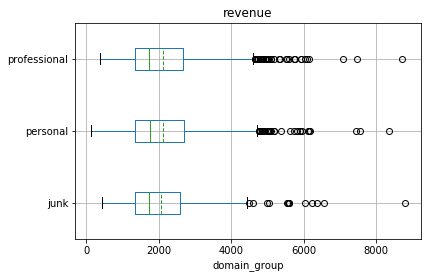

In [9]:
# Exploring categorical outliers

# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function can be used for categorical variables

    PARAMETERS
	----------
	response : str, response variable
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    df.boxplot(column 		 = response,
    	            by           = cat_var,
        	        vert         = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)
    
    plt.suptitle("")
    plt.show()


# calling the function for each categorical variable
categorical_boxplots(response = 'revenue',
					 cat_var  = 'domain_group',
					 data     = df)

In [10]:
# creating dummy variables for email domain groups
one_hot_domain_group = pd.get_dummies(df['domain_group'])

# joining codings together
df = df.join([one_hot_domain_group])

#creating the log of revenue

df['log_revenue']= np.log(df['revenue'])

In [11]:
# calculating if they bought any beverages.
# maximum price is 23, so everything above will go to beverages.
# we have to reverse engineer this metric, but it should be available.
# added safeguard for new customers without revenue

df['avg_spend'] = df['revenue']/df['total_meals_ordered']
avg_spend_change_hi = 23
df['beverages'] = 0
condition = df.loc[0:,'beverages'][df['avg_spend'] > avg_spend_change_hi]
condition_0 = df.loc[0:,'beverages'][df['avg_spend'] == 0]

df['beverages'].replace(to_replace = condition,
                                      value      = 1,
                                      inplace    = True)
df['beverages'].replace(to_replace = condition_0,
                                      value      = 0,
                                      inplace    = True)
df=df.drop('avg_spend',axis=1)


In [12]:
#looking at correlations
df.corr()
df_corr = df.corr().round(2)
#print(df_corr.loc['revenue'].sort_values(ascending = False))

In [13]:
#Building first full explanatory model

# making a copy of housing
df_explanatory = df.copy()


# dropping variables from the explanatory variable set
df_explanatory = df.drop(['revenue', 'name', 'email', 'first_name', 'family_name',
                         'email_domain', 'domain_group', 'log_revenue' ], axis=1)


# formatting each explanatory variable for statsmodels
for val in df_explanatory:
    print(f"df['{val}'] +")

df['cross_sell_success'] +
df['total_meals_ordered'] +
df['unique_meals_purch'] +
df['contacts_w_customer_service'] +
df['product_categories_viewed'] +
df['avg_time_per_site_visit'] +
df['mobile_number'] +
df['cancellations_before_noon'] +
df['cancellations_after_noon'] +
df['tastes_and_preferences'] +
df['mobile_logins'] +
df['pc_logins'] +
df['weekly_plan'] +
df['early_deliveries'] +
df['late_deliveries'] +
df['package_locker'] +
df['refrigerated_locker'] +
df['followed_recommendations_pct'] +
df['avg_prep_vid_time'] +
df['largest_order_size'] +
df['master_classes_attended'] +
df['median_meal_rating'] +
df['avg_clicks_per_visit'] +
df['total_photos_viewed'] +
df['m_family_name'] +
df['out_total_meals_ordered'] +
df['out_unique_meals_purch'] +
df['out_contacts_w_customer_service'] +
df['out_product_categories_viewed'] +
df['out_avg_time_per_site_visit'] +
df['out_cancellations_before_noon'] +
df['out_cancellations_after_noon'] +
df['out_mobile_logins'] +
df['out_pc_logins'] +
df['out_

In [1]:
# building a full model
# using logarithmic revenue as response variable as resluts are more reliable

# blueprinting a model type
lm_full = smf.ols(formula = """df['log_revenue']~df['cross_sell_success'] +
df['total_meals_ordered'] +
df['unique_meals_purch'] +
df['contacts_w_customer_service'] +
df['product_categories_viewed'] +
df['avg_time_per_site_visit'] +
df['mobile_number'] +
df['cancellations_before_noon'] +
df['cancellations_after_noon'] +
df['tastes_and_preferences'] +
df['mobile_logins'] +
df['pc_logins'] +
df['weekly_plan'] +
df['early_deliveries'] +
df['late_deliveries'] +
df['package_locker'] +
df['refrigerated_locker'] +
df['followed_recommendations_pct'] +
df['avg_prep_vid_time'] +
df['largest_order_size'] +
df['master_classes_attended'] +
df['median_meal_rating'] +
df['avg_clicks_per_visit'] +
df['total_photos_viewed'] +
df['m_family_name'] +
df['out_total_meals_ordered'] +
df['out_unique_meals_purch'] +
df['out_contacts_w_customer_service'] +
df['out_product_categories_viewed'] +
df['out_avg_time_per_site_visit'] +
df['out_cancellations_before_noon'] +
df['out_cancellations_after_noon'] +
df['out_mobile_logins'] +
df['out_pc_logins'] +
df['out_weekly_plan'] +
df['out_early_deliveries'] +
df['out_late_deliveries'] +
df['out_avg_prep_vid_time'] +
df['out_largest_order_size'] +
df['out_master_classes_attended'] +
df['out_median_meal_rating'] +
df['out_avg_clicks_per_visit'] +
df['out_total_photos_viewed'] +
df['out_revenue'] +
df['change_unique_meals_purch'] +
df['change_contacts_w_customer_service'] +
df['change_avg_time_per_site_visit'] +
df['change_largest_order_size'] +
df['change_avg_clicks_per_visit'] +
df['change_weekly_plan'] +
df['change_total_photos_viewed'] +
df['change_total_meals_ordered'] +
df['change_median_meal_rating'] +
df['change_lo_avg_clicks_per_visit_change'] +
df['junk'] +
df['personal'] +
df['professional'] +
df['beverages']""",
                               data = df)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

NameError: name 'smf' is not defined

In [15]:
# removing high p-values one by one

# remaining values
lm_full = smf.ols(formula = """df['log_revenue']~df['cross_sell_success'] +
df['total_meals_ordered'] +
df['unique_meals_purch'] +
df['contacts_w_customer_service'] +
df['avg_time_per_site_visit'] +
df['cancellations_after_noon'] +
df['package_locker'] +
df['avg_prep_vid_time'] +
df['largest_order_size'] +
df['master_classes_attended'] +
df['median_meal_rating'] +
df['out_total_meals_ordered'] +
df['out_avg_prep_vid_time'] +
df['out_largest_order_size'] +
df['out_master_classes_attended'] +
df['out_avg_clicks_per_visit'] +
df['change_contacts_w_customer_service'] +
df['change_total_photos_viewed'] +
df['change_total_meals_ordered'] +
df['change_median_meal_rating'] +
df['change_lo_avg_clicks_per_visit_change'] +
df['junk'] +
df['personal'] +
df['professional'] +
df['beverages'] 
""",
                               data = df)

# Excluded variables:
#df['out_contacts_w_customer_service'] +
#df['out_weekly_plan'] +
#df['out_early_deliveries'] +
#df['followed_recommendations_pct'] +
#df['m_family_name'] +
#df['change_avg_time_per_site_visit'] +
#df['out_product_categories_viewed'] +
#df['out_avg_time_per_site_visit'] +
#df['pc_logins'] +
#df['out_pc_logins'] +
#df['out_cancellations_before_noon'] +
#df['out_cancellations_after_noon'] +
#df['late_deliveries'] +
#df['cancellations_before_noon'] +
#df['weekly_plan'] +
#df['early_deliveries'] +
#df['avg_clicks_per_visit'] +
#df['total_photos_viewed'] +
#df['change_largest_order_size'] +
#df['change_weekly_plan'] +
#df['out_late_deliveries'] +
#df['mobile_number'] +
#df['out_median_meal_rating'] +
#df['refrigerated_locker'] +
#df['out_total_photos_viewed'] +
#df['product_categories_viewed'] +
#df['tastes_and_preferences'] +
#df['out_unique_meals_purch'] +
#df['change_unique_meals_purch'] +
#df['change_avg_clicks_per_visit'] +
#df['out_mobile_logins'] +
#df['mobile_logins'] +





# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      df['log_revenue']   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     332.8
Date:                Tue, 28 Jan 2020   Prob (F-statistic):               0.00
Time:                        21:44:18   Log-Likelihood:                 164.42
No. Observations:                1946   AIC:                            -282.8
Df Residuals:                    1923   BIC:                            -154.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       4.6395      0.038    123.094      0.000       4.566       4.713
df['cross_sell_success']                       -0.0282      0.011     -2.459      0.014      -0.051      -0.006
df['total_meals_ordered']                       0.0045      0.000     24.882      0.000       0.004       0.005
df['unique_meals_purch']                       -0.0276      0.002    -13.242      0.000      -0.032      -0.024
df['contacts_w_customer_service']               0.0384      0.004     10.280      0.000       0.031       0.046
df['avg_time_per_site_visit']                  -0.0002   8.67e-05     -1.931      0.054      -0.000    2.58e-06
df['cancellations_after_noon']                 -0.0231      0.012     -1.954      0.051      -0.046    8.47e-05
df['package_locker']                           -0.0207      0.011     -1.946      0.052      -0.042       0.000
df['avg_prep_vid_time']                         0.0028      0.000     12.464      0.000       0.002       0.003
df['largest_order_size']                       -0.0213      0.006     -3.594      0.000      -0.033      -0.010
df['master_classes_attended']                   0.0461      0.009      4.911      0.000       0.028       0.064
df['median_meal_rating']                        0.1319      0.014      9.235      0.000       0.104       0.160
df['out_total_meals_ordered']                  -0.1547      0.035     -4.404      0.000      -0.224      -0.086
df['out_avg_prep_vid_time']                    -0.1823      0.066     -2.771      0.006      -0.311      -0.053
df['out_largest_order_size']                   -0.0506      0.026     -1.916      0.055      -0.102       0.001
df['out_master_classes_attended']           -6.955e-16   1.09e-16     -6.388      0.000   -9.09e-16   -4.82e-16
df['out_avg_clicks_per_visit']                 -0.1353      0.047     -2.851      0.004      -0.228      -0.042
df['change_contacts_w_customer_service']       -0.7526      0.164     -4.580      0.000      -1.075      -0.430
df['change_total_photos_viewed']               -0.0436      0.011     -3.803      0.000      -0.066      -0.021
df['change_total_meals_ordered']                0.3250      0.163      1.988      0.047       0.004       0.646
df['change_median_meal_rating']                 0.0551      0.021      2.619      0.009       0.014       0.096
df['change_lo_avg_clicks_per_visit_change']    -0.1353      0.047     -2.851      0.004      -0.228      -0.042
df['junk']                                      1.5543      0.015    101.544      0.000       1.524       1.584
df['personal']                                  1.5405      0.014    108.108      0.000       1.513       1.568
df['professional']                              1.5448     

In [16]:
# Model 1: Base Model Variables

# selecting x variables for this model
x_variables = ['cross_sell_success',
       'total_meals_ordered', 
       'unique_meals_purch',
       'contacts_w_customer_service',
       'avg_time_per_site_visit',
       'cancellations_after_noon',
       'package_locker',
       'avg_prep_vid_time', 
       'largest_order_size', 
       'master_classes_attended',
       'median_meal_rating',
       'out_total_meals_ordered',
       'out_pc_logins',
       'out_avg_prep_vid_time', 
       'out_largest_order_size',
       'out_master_classes_attended',
       'out_avg_clicks_per_visit',
       'change_contacts_w_customer_service',
       'change_avg_clicks_per_visit',
       'change_total_photos_viewed', 
       'change_total_meals_ordered',
       'change_median_meal_rating', 
       'change_lo_avg_clicks_per_visit_change',
       'junk', 
       'personal', 
       'professional',
       'beverages']


# Preparing a DataFrame based the the analysis above
df_data   = df.loc[ : , x_variables]


# Preparing the target variable
df_target = df.loc[:, 'log_revenue']


# running train/test split again
X_train, X_test, y_train, y_test = train_test_split(
            df_data,
            df_target,
            test_size = 0.25,
            random_state = 222)

###Linear Regression###

# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results
print('LR Training Score:', lr.score(X_train, y_train).round(4))
print('LR Testing Score:',  lr.score(X_test, y_test).round(4))


# saving scoring data for future use
lr_train_score = lr.score(X_train, y_train).round(4)
lr_test_score  = lr.score(X_test, y_test).round(4)

###Ridge###

# INSTANTIATING a model object
ridge_model = sklearn.linear_model.Ridge()

# FITTING the training data
ridge_fit = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_model.predict(X_test)

print('Ridge Training Score:', ridge_model.score(X_train, y_train).round(4))
print('Ridge Testing Score:',  ridge_model.score(X_test, y_test).round(4))


# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)

###lasso###

# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso()

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)

# PREDICTING on new data
lasso_pred = lasso_model.predict(X_test)

print('Lasso Training Score:', lasso_model.score(X_train, y_train).round(4))
print('Lasso Testing Score:',  lasso_model.score(X_test, y_test).round(4))


# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)

### ARD Bayesian Regression###
#Note: ARD is very slow. Results were not justifying processing time

# INSTANTIATING a model object
#ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
#ard_fit = ard_model.fit(X_train, y_train)


# PREDICTING on new data
#ard_pred = ard_model.predict(X_test)


#print('ARD Training Score:', ard_model.score(X_train, y_train).round(4))
#print('ARD Testing Score:',  ard_model.score(X_test, y_test).round(4))


#saving scoring data for future use
#ard_train_score = ard_model.score(X_train, y_train).round(4)
#ard_test_score  = ard_model.score(X_test, y_test).round(4)

LR Training Score: 0.7983
LR Testing Score: 0.7642
Ridge Training Score: 0.7974
Ridge Testing Score: 0.7663
Lasso Training Score: 0.5386
Lasso Testing Score: 0.5065


In [17]:
#Standardizing 
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(df_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(df_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# adding labels to the scaled DataFrame
X_scaled_df.columns = df_data.columns


In [18]:
# standardised KNN

# train test on the scaled data
X_train, X_test, y_train, y_test = train_test_split(
            X_scaled_df,
            df_target,
            test_size = 0.25,
            random_state = 222)

# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization
# visual output removed for better performance
#fig, ax = plt.subplots(figsize=(12,8))
#plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
#plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
#plt.ylabel("Accuracy")
#plt.xlabel("n_neighbors")
#plt.legend()
#plt.show()


# finding the optimal number of neighbors
# printing output removed
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
#print(f"""The optimal number of neighbors is {opt_neighbors}""")

# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                                n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_stand.fit(X_train, y_train)



# PREDITCING on new data
knn_stand_pred = knn_stand.predict(X_test)



# SCORING the results
print('Training Score:', knn_stand.score(X_train, y_train).round(4))
print('Testing Score:',  knn_stand.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_stand_score_train = knn_stand.score(X_train, y_train).round(4)
knn_stand_score_test  = knn_stand.score(X_test, y_test).round(4)

Training Score: 0.748
Testing Score: 0.6964


In [19]:
# Model 3: standardised Models

# Preparing the target variable
df_target = df.loc[:, 'log_revenue']


#running scaled train test split
X_train, X_test, y_train, y_test = train_test_split(
            X_scaled_df,
            df_target,
            test_size = 0.25,
            random_state = 222)

###Linear Regression###

# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results
print('LR Training Score:', lr.score(X_train, y_train).round(4))
print('LR Testing Score:',  lr.score(X_test, y_test).round(4))


# saving scoring data for future use
lr_train_score = lr.score(X_train, y_train).round(4)
lr_test_score  = lr.score(X_test, y_test).round(4)

###Ridge###

# INSTANTIATING a model object
ridge_model = sklearn.linear_model.Ridge(alpha=1.0)

# FITTING the training data
ridge_fit = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_model.predict(X_test)

print('Ridge Training Score:', ridge_model.score(X_train, y_train).round(4))
print('Ridge Testing Score:',  ridge_model.score(X_test, y_test).round(4))


# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)

###lasso###

# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha= 0.0)

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)

# PREDICTING on new data
lasso_pred = lasso_model.predict(X_test)

print('Lasso Training Score:', lasso_model.score(X_train, y_train).round(4))
print('Lasso Testing Score:',  lasso_model.score(X_test, y_test).round(4))


# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)


LR Training Score: 0.7983
LR Testing Score: 0.7642
Ridge Training Score: 0.7982
Ridge Testing Score: 0.7651
Lasso Training Score: 0.7983
Lasso Testing Score: 0.7642


C:\Users\Georg\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Users\Georg\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Georg\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.23189821067903, tolerance: 0.03394110196184309
  positive)


In [20]:
# Grid Search Hyperparameter tuning

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(
                    df_data,
                    df_target, 
                    test_size=0.25, 
                    random_state=222)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_pred, y_test)

# removed printed output for better performance
#print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
#print("Tuned ElasticNet R squared: {}".format(r2))
#print("Tuned ElasticNet MSE: {}".format(mse))




C:\Users\Georg\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.16619911895512, tolerance: 0.027039795054083597
  positive)
C:\Users\Georg\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.58568521369669, tolerance: 0.0277458314701326
  positive)
C:\Users\Georg\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.94467520242521, tolerance: 0.026349210872090034
  positive)
C:\Users\Georg\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

Lasso Training Score: 0.7625
Lasso Testing Score: 0.6926
[-2.05538446e+01  6.48688269e+02 -1.36647408e+02  1.93708798e+02
 -7.37640976e+01 -1.53837229e+01  7.61612929e+00  3.34354635e+02
 -9.57211270e+01  6.47275143e+01  2.64101390e+02 -1.39979979e+02
 -5.33492799e+00 -6.93430824e+00  9.24423504e+00  0.00000000e+00
 -4.66850390e+01 -4.46013530e+02 -8.29971735e+01 -5.94831641e+01
  3.57056341e+02  1.30335543e+02 -1.51354428e+01  0.00000000e+00
 -1.69897120e+01  6.96668495e-02  4.15244033e+02]


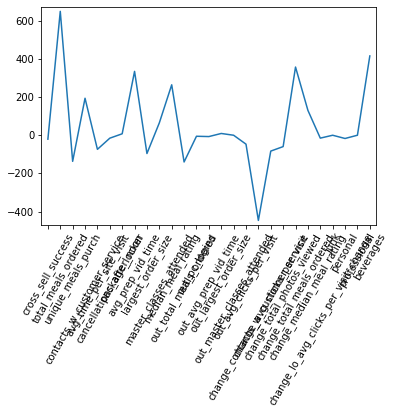

In [21]:
# Parameter checking for Lasso regression
# Model 3: standardised Models

# selecting x variables for this model
x_variables = ['cross_sell_success',
       'total_meals_ordered', 
       'unique_meals_purch',
       'contacts_w_customer_service',
       'avg_time_per_site_visit',
       'cancellations_after_noon',
       'package_locker',
       'avg_prep_vid_time', 
       'largest_order_size', 
       'master_classes_attended',
       'median_meal_rating',
       'out_total_meals_ordered',
       'out_pc_logins',
       'out_avg_prep_vid_time', 
       'out_largest_order_size',
       'out_master_classes_attended',
       'out_avg_clicks_per_visit',
       'change_contacts_w_customer_service',
       'change_avg_clicks_per_visit',
       'change_total_photos_viewed', 
       'change_total_meals_ordered',
       'change_median_meal_rating', 
       'change_lo_avg_clicks_per_visit_change',
       'junk', 'personal', 'professional',
       'beverages'
       ]


# Preparing a DataFrame based the the analysis above
df_data   = df.loc[ : , x_variables]


# Preparing the target variable
df_target = df.loc[:, 'revenue']

#Standardizing 
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(df_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(df_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# adding labels to the scaled DataFrame
X_scaled_df.columns = df_data.columns

#running scaled train test split
X_train, X_test, y_train, y_test = train_test_split(
            X_scaled_df,
            df_target,
            test_size = 0.25,
            random_state = 222)

#

###lasso###

# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha= 0.5)

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)

# PREDICTING on new data
lasso_pred = lasso_model.predict(X_test)

print('Lasso Training Score:', lasso_model.score(X_train, y_train).round(4))
print('Lasso Testing Score:',  lasso_model.score(X_test, y_test).round(4))

# Compute and print the coefficients
lasso_coef = lasso_fit.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_data.columns)), lasso_coef)
plt.xticks(range(len(df_data.columns)), df_data.columns.values, rotation=60)
plt.margins(0.02)
#removed output for performance
#plt.show()

# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)


In [22]:
# Model 1: Adjusting hyperparameters from above insights

# selecting x variables for this model
x_variables = ['cross_sell_success',
       'total_meals_ordered', 
       'unique_meals_purch',
       'contacts_w_customer_service',
       'avg_time_per_site_visit',
       'cancellations_after_noon',
       'package_locker',
       'avg_prep_vid_time', 
       'largest_order_size', 
       'master_classes_attended',
       'median_meal_rating',
       'out_total_meals_ordered',
       'out_pc_logins',
       'out_avg_prep_vid_time', 
       'out_largest_order_size',
       'out_master_classes_attended',
       'out_avg_clicks_per_visit',
       'change_contacts_w_customer_service',
       'change_avg_clicks_per_visit',
       'change_total_photos_viewed', 
       'change_total_meals_ordered',
       'change_median_meal_rating', 
       'change_lo_avg_clicks_per_visit_change',
       'junk', 'personal', 'professional',
       'beverages']


# Preparing a DataFrame based the the analysis above
df_data   = df.loc[ : , x_variables]


# Preparing the target variable
df_target = df.loc[:, 'log_revenue']


# running train/test split
X_train, X_test, y_train, y_test = train_test_split(
            df_data,
            df_target,
            test_size = 0.25,
            random_state = 222)

###Linear Regression###

# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results
print('LR Training Score:', lr.score(X_train, y_train).round(4))
print('LR Testing Score:',  lr.score(X_test, y_test).round(4))


# saving scoring data for future use
lr_train_score = lr.score(X_train, y_train).round(4)
lr_test_score  = lr.score(X_test, y_test).round(4)

###Ridge###

# INSTANTIATING a model object
ridge_model = sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False)

# FITTING the training data
ridge_fit = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_model.predict(X_test)

print('Ridge Training Score:', ridge_model.score(X_train, y_train).round(4))
print('Ridge Testing Score:',  ridge_model.score(X_test, y_test).round(4))


# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)

###lasso###

# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha=1.0)
# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)

# PREDICTING on new data
lasso_pred = lasso_model.predict(X_test)

print('Lasso Training Score:', lasso_model.score(X_train, y_train).round(4))
print('Lasso Testing Score:',  lasso_model.score(X_test, y_test).round(4))


# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)


LR Training Score: 0.7983
LR Testing Score: 0.7642
Ridge Training Score: 0.7974
Ridge Testing Score: 0.7663
Lasso Training Score: 0.5386
Lasso Testing Score: 0.5065


In [23]:
#Ensemble model

# Model 3: standardised Models

# selecting x variables for this model
x_variables = ['cross_sell_success',
       'total_meals_ordered', 'unique_meals_purch',
       'contacts_w_customer_service',
       'avg_time_per_site_visit',
       'cancellations_after_noon',
        'package_locker',
       'avg_prep_vid_time', 'largest_order_size', 'master_classes_attended',
       'median_meal_rating',
       'out_total_meals_ordered',
       'out_pc_logins',
       'out_avg_prep_vid_time', 'out_largest_order_size',
       'out_master_classes_attended',
       'out_avg_clicks_per_visit',
       'change_contacts_w_customer_service',
       'change_avg_clicks_per_visit',
       'change_total_photos_viewed', 'change_total_meals_ordered',
       'change_median_meal_rating', 'change_lo_avg_clicks_per_visit_change',
       'junk', 'personal', 'professional',
       'beverages'
       ]


# Preparing a DataFrame based the the analysis above
df_data   = df.loc[ : , x_variables]


# Preparing the target variable
df_target = df.loc[:, 'log_revenue']

# running train/test split again
X_train, X_test, y_train, y_test = train_test_split(
            df_data,
            df_target,
            test_size = 0.25,
            random_state = 222)


###Linear Regression###

# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results
print('LR Training Score:', lr.score(X_train, y_train).round(4))
print('LR Testing Score:',  lr.score(X_test, y_test).round(4))


# saving scoring data for future use
lr_train_score = lr.score(X_train, y_train).round(4)
lr_test_score  = lr.score(X_test, y_test).round(4)

###Ridge###

# INSTANTIATING a model object
ridge_model = sklearn.linear_model.Ridge(alpha=1.0)

# FITTING the training data
ridge_fit = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_model.predict(X_test)

print('Ridge Training Score:', ridge_model.score(X_train, y_train).round(4))
print('Ridge Testing Score:',  ridge_model.score(X_test, y_test).round(4))


# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)

###lasso###

# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha= 0.5)

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)

# PREDICTING on new data
lasso_pred = lasso_model.predict(X_test)

print('Lasso Training Score:', lasso_model.score(X_train, y_train).round(4))
print('Lasso Testing Score:',  lasso_model.score(X_test, y_test).round(4))


# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)



#KNN Model
X_train, X_test, y_train, y_test = train_test_split(
            X_scaled_df,
            df_target,
            test_size = 0.25,
            random_state = 222)

# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization
#fig, ax = plt.subplots(figsize=(12,8))
#plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
#plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
#plt.ylabel("Accuracy")
#plt.xlabel("n_neighbors")
#plt.legend()
#plt.show()


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                                n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_stand.fit(X_train, y_train)



# PREDITCING on new data
knn_stand_pred = knn_stand.predict(X_test)



# SCORING the results
print('KNN Training Score:', knn_stand.score(X_train, y_train).round(4))
print('KNN Testing Score:',  knn_stand.score(X_test, y_test).round(4))

#Ensemble learning

# running train/test split again, to remove standardization
X_train, X_test, y_train, y_test = train_test_split(
            df_data,
            df_target,
            test_size = 0.25,
            random_state = 222)

# Define the list classifiers
classifiers = [('Linear Regression', lr), ('K Nearest Neighbours', knn_stand), ('Lasso', lasso_model), ('Ridge', ridge_model)]

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
# SCORING the results
print('Ensemble Training Score:', clf.score(X_train, y_train).round(4))
print('Ensemble Testing Score:',  clf.score(X_test, y_test).round(4))
    

LR Training Score: 0.7983
LR Testing Score: 0.7642
Ridge Training Score: 0.7974
Ridge Testing Score: 0.7663
Lasso Training Score: 0.5426
Lasso Testing Score: 0.503
The optimal number of neighbors is 13
KNN Training Score: 0.748
KNN Testing Score: 0.6964
Ensemble Training Score: 0.7974
Ensemble Testing Score: 0.7663


In [24]:
#gradient bosting


GB = GradientBoostingRegressor(
                               max_depth= 2, 
                               min_samples_leaf=0.08, 
                               n_estimators= 500, 
                               random_state=222)


# fitting the model

GB.fit(X_train, y_train)


# predicting
GB_pred = GB.predict(X_test)


# SCORING the results
print('Gradient Boosting Training Score:', GB.score(X_train, y_train).round(4))
print('Gradient Boosting Testing Score:',  GB.score(X_test, y_test).round(4))


# saving scoring data for future use
GB_score_train = GB.score(X_train, y_train).round(4)
GB_score_test  = GB.score(X_test, y_test).round(4)

Gradient Boosting Training Score: 0.8981
Gradient Boosting Testing Score: 0.8427
